<a href="https://colab.research.google.com/github/sandeep7348/Assignment/blob/master/ChurnModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
df=pd.read_csv("Churn_Modelling.csv")
print(df)
X=df.iloc[:,3:13].values
y=df.iloc[:,13].values
print(X)
print(y)

      RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary Exited
0             1    15634602   Hargrave  ...               1       101348.88      1
1             2    15647311       Hill  ...               1       112542.58      0
2             3    15619304       Onio  ...               0       113931.57      1
3             4    15701354       Boni  ...               0        93826.63      0
4             5    15737888   Mitchell  ...               1        79084.10      0
...         ...         ...        ...  ...             ...             ...    ...
9995       9996    15606229   Obijiaku  ...               0        96270.64      0
9996       9997    15569892  Johnstone  ...               1       101699.77      0
9997       9998    15584532        Liu  ...               1        42085.58      1
9998       9999    15682355  Sabbatini  ...               0        92888.52      1
9999      10000    15628319     Walker  ...               0        38190.78      0

[10

In [10]:
print(df.shape)

(10000, 14)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [14]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [16]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [19]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

KeyError: "None of [Index(['Geography', 'Gender'], dtype='object')] are in the [columns]"

In [20]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [22]:
df.shape

(10000, 12)

In [28]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=42)

In [29]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
399,616,66,1,135842.41,1,1,0,183840.51,False,False,False
7247,582,40,3,110150.43,1,1,1,191757.65,True,False,False
6406,684,33,4,140700.61,1,1,0,103557.93,False,False,True
882,565,36,6,106192.10,1,1,0,149575.59,False,False,True
3565,676,30,5,0.00,2,0,1,157888.50,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,False,False,True
5191,682,58,1,0.00,1,1,1,706.50,False,False,False
5390,735,38,1,0.00,3,0,0,92220.12,False,False,False
860,667,43,8,190227.46,1,1,0,97508.04,False,False,True


In [30]:
y_train

,Exited
399,1
7247,1
6406,0
882,0
3565,0
...,...
5734,0
5191,0
5390,1
860,1


In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
print(X_train_scaled)
X_test_scaled=scaler.transform(X_test)
print(X_test_scaled)

[[-0.38381126  2.60786056 -1.37934576 ... -0.57427105 -0.58350885
  -1.12244688]
 [-0.73723819  0.12136034 -0.68041201 ...  1.74133801 -0.58350885
  -1.12244688]
 [ 0.32304261 -0.54808203 -0.33094513 ... -0.57427105 -0.58350885
   0.89091075]
 ...
 [ 0.85318301 -0.06990891 -1.37934576 ... -0.57427105 -0.58350885
  -1.12244688]
 [ 0.14632915  0.40826421  1.06692237 ... -0.57427105 -0.58350885
   0.89091075]
 [ 0.45817644  1.1733412  -1.37934576 ...  1.74133801 -0.58350885
   0.89091075]]
[[-0.59170945 -0.64371665 -0.68041201 ...  1.74133801 -0.58350885
   0.89091075]
 [-0.31104689  0.40826421 -1.37934576 ... -0.57427105 -0.58350885
   0.89091075]
 [-0.5397349   0.50389883 -0.33094513 ... -0.57427105  1.71377008
  -1.12244688]
 ...
 [ 0.63488991 -0.54808203  1.06692237 ... -0.57427105  1.71377008
   0.89091075]
 [ 0.47896626 -0.35681278  0.01852174 ... -0.57427105 -0.58350885
   0.89091075]
 [-1.39211751 -0.45244741  0.01852174 ... -0.57427105 -0.58350885
   0.89091075]]


In [34]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [61]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='relu'))
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [75]:
model.fit(X_train_scaled,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.3954 - val_loss: 0.6711
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.4047 - val_loss: 0.6366
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4191 - val_loss: 0.7354
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.3936 - val_loss: 0.7234
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3734 - val_loss: 0.6644
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3898 - val_loss: 0.7187
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3362 - val_loss: 0.6954
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4433 - val_loss: 0.6751
Epoch 9/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3802 - val_loss: 0.6943
Epoch 10/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3993 - val_loss: 0.6918
Epoch 11/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4143 - val_loss: 0.6614
Epoch 12/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 

In [76]:
model.layers[0].get_weights()

[array([[-0.21376263,  0.12854472,  0.10522387,  0.3192762 , -0.20390058,
          0.20954646,  0.17501742,  0.32361868, -0.20372047,  0.17221457,
          0.14001311],
        [ 0.5038115 , -0.07018772, -1.1341856 ,  0.081154  , -0.02463465,
         -0.9575188 , -0.23789132, -0.02745199, -0.20168246, -0.47511736,
         -0.3372389 ],
        [-0.21042193,  0.05944348,  0.20271364, -0.58000267,  0.36252713,
          0.48481074,  0.49706516, -0.24186788,  0.05999864, -0.430902  ,
         -0.5381972 ],
        [-0.1892485 , -0.30249313, -0.50997466,  0.16078196,  0.4972829 ,
          0.03994906, -0.47319674, -0.4367133 , -0.30571228,  0.02549908,
          0.7598927 ],
        [-1.1353269 , -0.47996807, -0.4619401 ,  0.6203652 ,  0.7647294 ,
          0.48696494, -0.25418115,  0.43515387, -0.7665718 ,  0.35211894,
          0.03800279],
        [-0.02385196,  0.11548597, -0.00223113,  0.19306092,  0.26308757,
         -0.33453408,  0.50989777, -0.33209023, -0.20479749, -0.4019044

In [77]:
y_log=model.predict(X_test_scaled)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [78]:
y_pred=np.where(y_log>0.5,1,0)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8215

{'loss': [0.38753101229667664, 0.38768112659454346, 0.38607606291770935, 0.38773268461227417, 0.3866751194000244, 0.38654690980911255, 0.3856808543205261, 0.38495564460754395, 0.3846338391304016, 0.38398388028144836, 0.3823687434196472, 0.3833872675895691, 0.38186463713645935, 0.3830295205116272, 0.38128507137298584, 0.3822389245033264, 0.3799133002758026, 0.3788940906524658, 0.37949898838996887, 0.3792034089565277, 0.3783237338066101, 0.37673455476760864, 0.37668824195861816, 0.37575802206993103, 0.37595975399017334, 0.3760218322277069, 0.3756552040576935, 0.37427249550819397, 0.3738745450973511, 0.37428444623947144, 0.3729051649570465, 0.3737911581993103, 0.37348654866218567, 0.3739544749259949, 0.3832259774208069, 0.35983791947364807, 0.3526562750339508, 0.3504330813884735, 0.35720497369766235, 0.35596373677253723, 0.3556362986564636, 0.35399219393730164, 0.35365578532218933, 0.3525083065032959, 0.35250428318977356, 0.3517378270626068, 0.3506139814853668, 0.35076117515563965, 0.3507

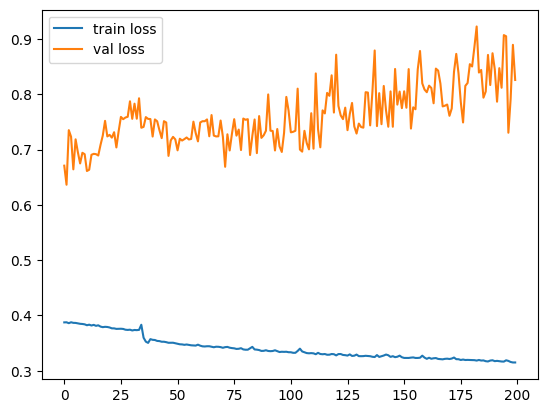

In [87]:
print(model.history.history)
from matplotlib import pyplot as plt
plt.plot(model.history.history['loss'],label='train loss')
plt.plot(model.history.history['val_loss'],label='val loss')
plt.legend()
plt.show()
